<a href="https://colab.research.google.com/github/yeonhas/study_2023/blob/main/AI/Ai_ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


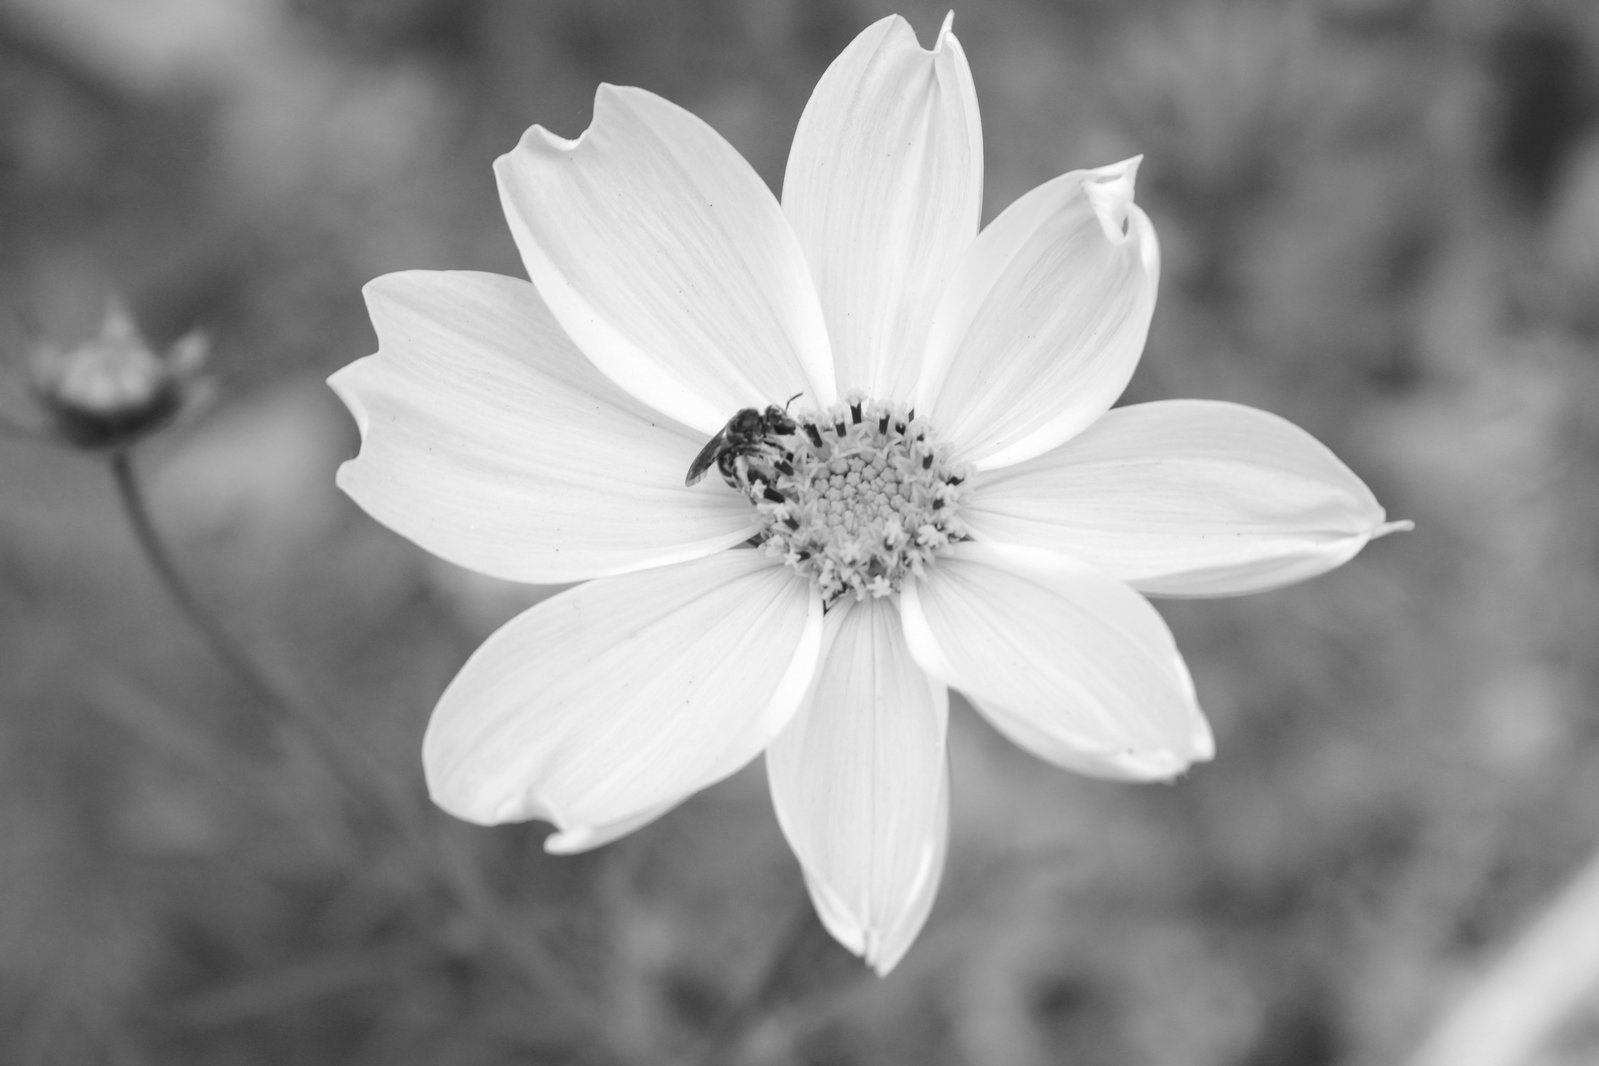

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('flower.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

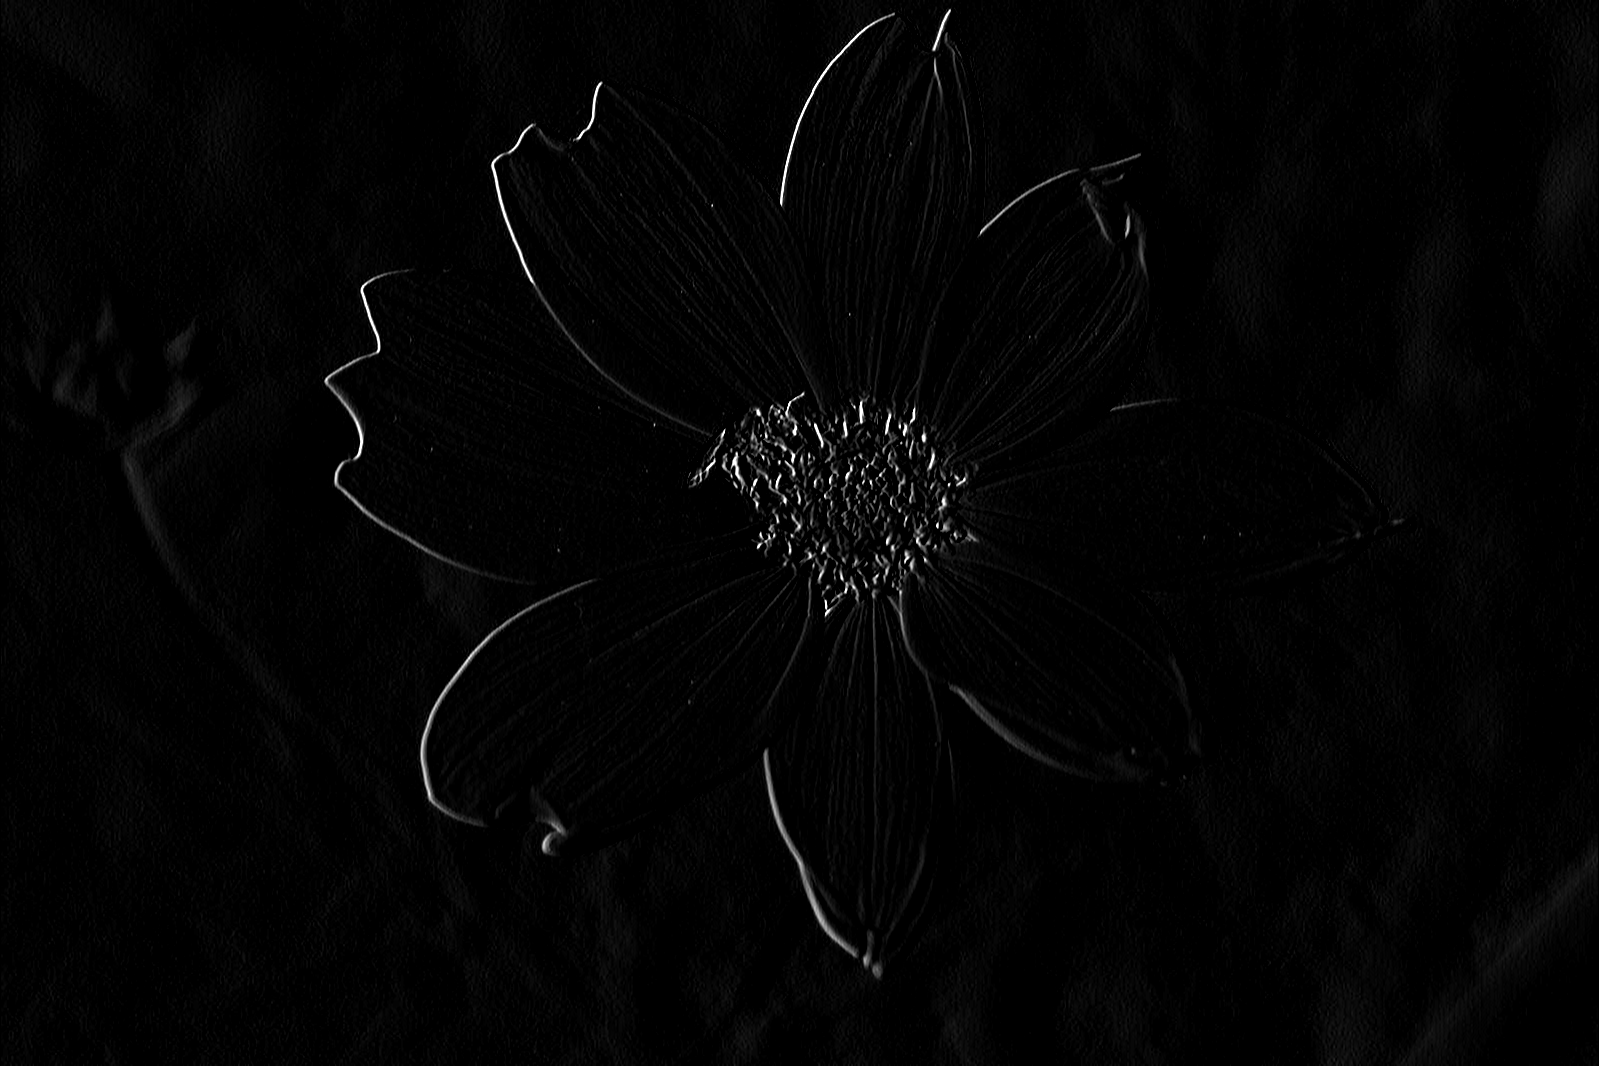

In [ ]:
import numpy as np
filter = np.array([[-1,0,1],[-2,0,2], [-1,0,1]])
f_img = cv2.filter2D(img, -1, filter)
cv2_imshow(f_img)

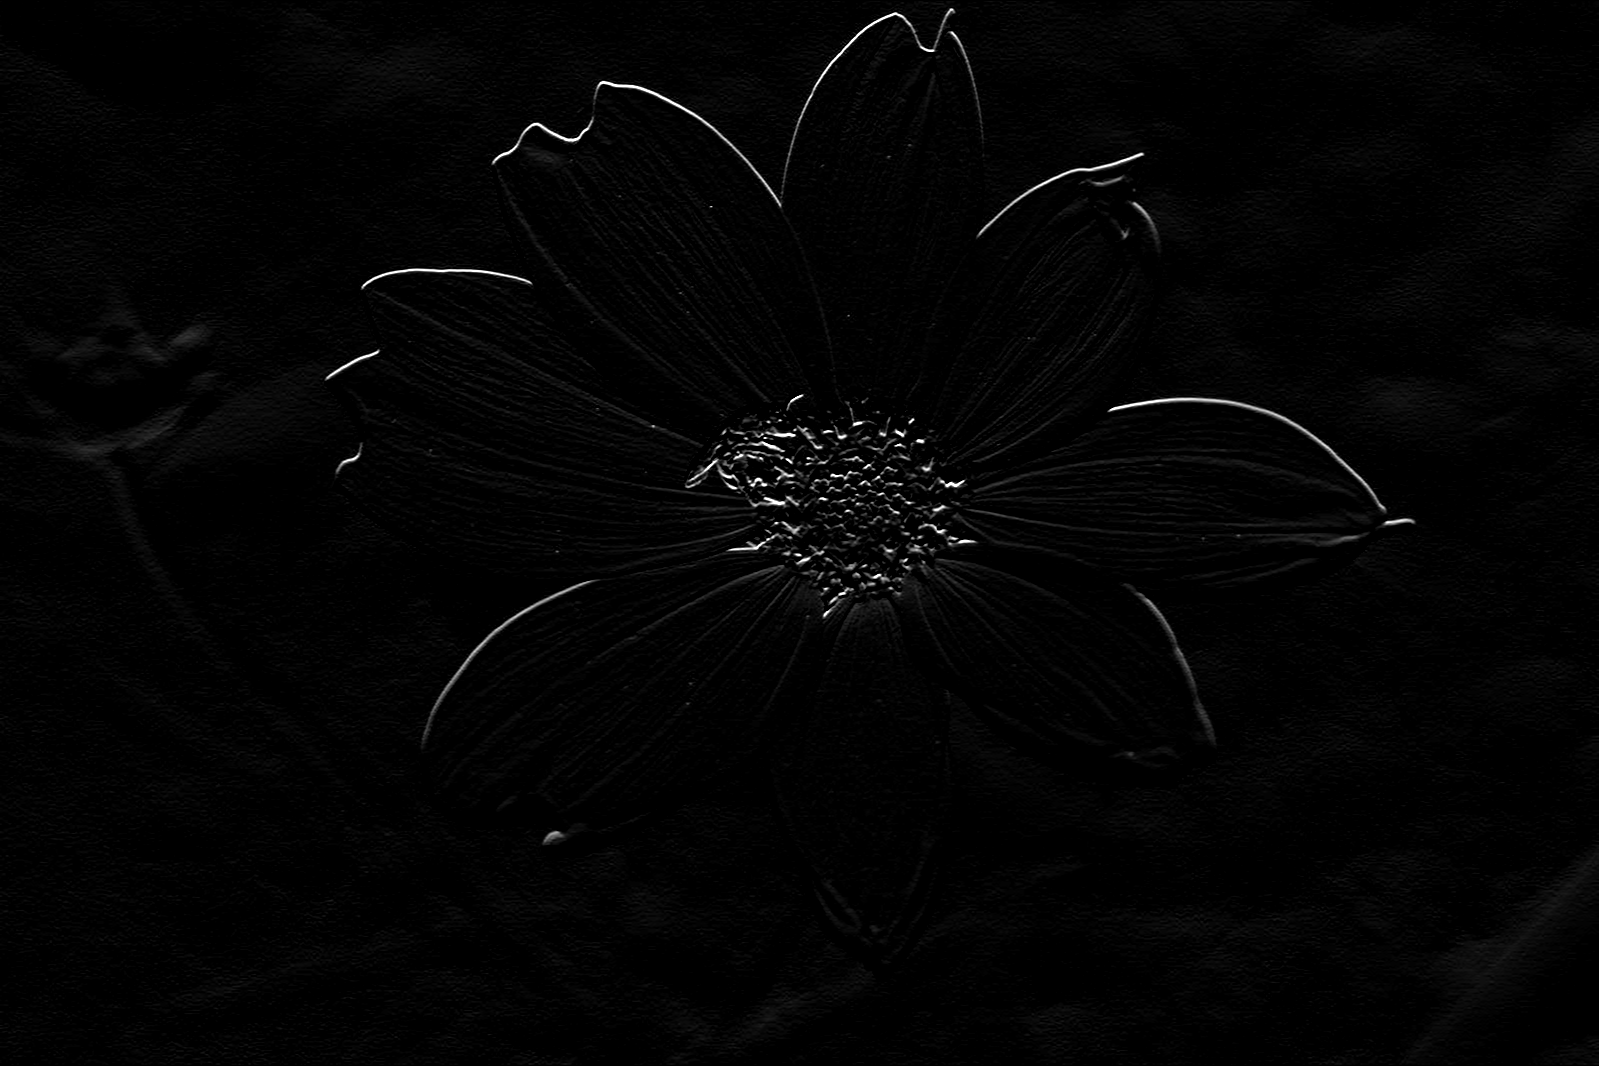

In [ ]:
import numpy as np
filter = np.array([[-1,-2,-1],[0,0,0], [1,2,1]])
f_img = cv2.filter2D(img, -1, filter)
cv2_imshow(f_img)

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('./sample_data/mnist_train_small.csv', header=None)
data = np.array(data)

In [ ]:
print(data)
print(data.shape)

[[6 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]
(20000, 785)


In [ ]:
print(data[0,:])

[  6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  24  67  67
  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 131 252 252  66   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 159 250
 232  30  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  15 222 252 108   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 147
 252 183   5   0   0   0   0   0   0   0  20  89  8

In [ ]:
x_train = data[:, 1:]
y_train = data[:, 0]
x_train = x_train.reshape(-1,28,28)

In [ ]:
x_train.shape

(20000, 28, 28)

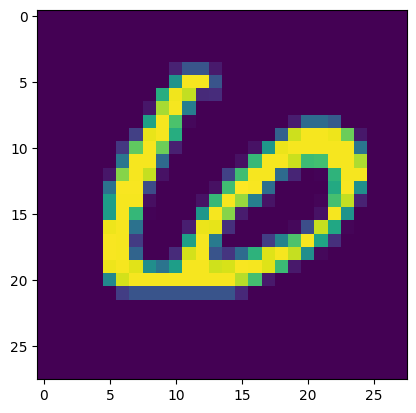

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0,:,:])

In [ ]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras import layers
from keras import optimizers

In [ ]:
x_train = np.expand_dims(x_train,-1)
y_train = keras.utils.to_categorical(y_train)

In [ ]:
model = Sequential()
model.add(layers.Conv2D(filters=8, kernel_size = 3, input_shape=(28,28,1), activation='relu'))
model.add(layers.Conv2D(filters=16, kernel_size = 3, activation='relu'))
model.add(layers.MaxPooling2D(strides = 2, padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size=64, validation_split=0.3)

Epoch 1/10
219/219 [==============================] - 16s 67ms/step - loss: 3.9748 - accuracy: 0.8030 - val_loss: 0.3624 - val_accuracy: 0.9277
Epoch 2/10
219/219 [==============================] - 10s 47ms/step - loss: 0.1976 - accuracy: 0.9474 - val_loss: 0.1780 - val_accuracy: 0.9503
Epoch 3/10
219/219 [==============================] - 11s 49ms/step - loss: 0.0857 - accuracy: 0.9749 - val_loss: 0.1586 - val_accuracy: 0.9583
Epoch 4/10
219/219 [==============================] - 12s 54ms/step - loss: 0.0465 - accuracy: 0.9860 - val_loss: 0.1325 - val_accuracy: 0.9683
Epoch 5/10
219/219 [==============================] - 11s 51ms/step - loss: 0.0260 - accuracy: 0.9904 - val_loss: 0.1228 - val_accuracy: 0.9695
Epoch 6/10
219/219 [==============================] - 11s 51ms/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.1439 - val_accuracy: 0.9710
Epoch 7/10
219/219 [==============================] - 11s 51ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.1417 - val_accuracy:

In [ ]:
data = pd.read_csv('./sample_data/mnist_test.csv', header=None)
data = np.array(data)

In [ ]:
x_test=data[:,1:]
y_test=data[:,0]
x_test=x_test.reshape(-1,28,28,1)

In [ ]:
o = model.predict(x_test)
o = np.argmax(o, -1)
print(o[0])

313/313 [==============================] - 3s 8ms/step
7


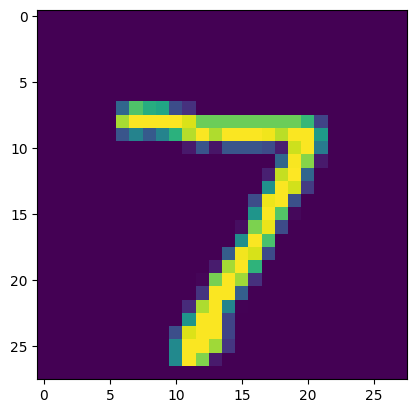

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0, :, :].reshape(28,28))

In [ ]:
sum(y_test == o)/len(y_test)

0.974